In [1]:
import warnings
warnings.filterwarnings('ignore')

### Run in collab
<a href="https://colab.research.google.com/github/racousin/rl_introduction/blob/master/notebooks/2_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install swig==4.2.1
!pip install box2d-py==2.3.8
!pip install gymnasium[box2d,atari,accept-rom-license]==0.29.1
!pip install pyvirtualdisplay==3.0
!pip install opencv-python-headless
!pip install imageio imageio-ffmpeg
!git clone https://github.com/racousin/rl_introduction.git > /dev/null 2>&1

# 2_Dynamic_Programming

### Objective
Before we go any further into RL. We will compute the best agent when the model is perfectly known (MDP). As example, we will solve the FrozenLake problem.

**Complete the TODO steps! Good luck!**

In [2]:
import numpy as np
import gym
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from rl_introduction.rl_introduction.tools import Agent, plot_values_lake
from rl_introduction.rl_introduction.render_colab import gym_render
env = gym.make('FrozenLake-v1')

### FrozenLake- environment
The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

The surface is described using a grid like the following:
    
SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)

In [3]:
#TODO: Get the state, action size

In [4]:
#Done: Get the state, action size
print(f"state size {env.observation_space.n}")
print(f"action size {env.action_space}")

state size 16
action size Discrete(4)


In [5]:
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        rews = []
        while done is False:
            action = agent.act(state)
            state, reward, done, info = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
    return rewards

In [6]:
gym_render(env_name='FrozenLake-v1', directory='./video', agent = 'random', slow_coeff=10)

  result = np.fromstring(s, dtype='uint8')



## 1) env transition model

We are access of the transition model, $P(S_{t+1}=s'|S_t = s, A_t=a)$ and the associated reward using <b>env.P[s][a]</b>. For example, the probabilities of each possible reward and next state, if the agent is in state 1 of the gridworld and decides to go left.

In [7]:
state = 1
action = 0 #left

In [8]:
# P(s'|state,action), s', reward, done
env.P[state][action]

[(0.3333333333333333, 1, 0.0, False),
 (0.3333333333333333, 0, 0.0, False),
 (0.3333333333333333, 5, 0.0, True)]

We see here that there is a $1/3$ probability falling in the hole in state 5 (and finish the episode).

To resume, we have 

**States:** $S = \{0,...,15\}$

**Actions:** $A = \{0,1,2,3\}$

**Transition model:** $P_{ss'}^a = \mathbb{P} [S_{t+1} = s' \vert S_t = s, A_t = a]$ -> env.P[state][action]

**Reward function:**
$R(s, a) = \mathbb{E} [R_{t+1} \vert S_t = s, A_t = a]$

$\forall a \in {1,2,3} : R(14,a) = 1/3$
    
$R(14,0) = 0$

$\forall a \in A \forall s \in \{0,...,13\} : R(s,a) = 0$

## 2) agent policy
We add to our agent its <b>policy</b> $\pi(a|s)$.

In [9]:
#TODO: write Random Policy (ex uniformly random policy)
class MyRandomAgent(Agent):
    def __init__(self, env):
        super().__init__(env)
        self.policy = None#complete here
    def act(self, state):
        action = np.random.choice(np.arange(self.env.action_space.n),p=self.policy[state])
        return action

In [10]:
#Done: write an uniformly random policy
class MyRandomAgent(Agent):
    def __init__(self, env):
        super().__init__(env)
        self.policy = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n
    def act(self, state):
        action = np.random.choice(np.arange(self.env.action_space.n),p=self.policy[state])
        return action

In [11]:
agent = MyRandomAgent(env)
agent.policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [12]:
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        rews = []
        while done is False:
            action = agent.act(state)
            state, reward, done, info = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
    return rewards

In [13]:
#TODO: eval Random Policy with run_experiment_episode

Text(0.5, 1.0, 'cumulative reward per episode - rand_agent')

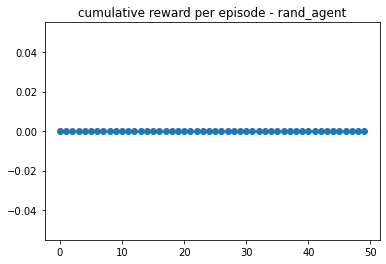

In [14]:
#Done: eval Random Policy with run_experiment_episode
mdp_agent = MyRandomAgent(env)
rewards = run_experiment_episode(env, mdp_agent, 50)
plt.plot(rewards, 'o')
plt.title('cumulative reward per episode - rand_agent')

## 2) Policy Evaluation

The Value Function $V_\pi(s)$ is the expected return in state $s$, according to $\pi$.
$V_\pi(s) 
= \mathbb{E}_\pi [r + \gamma V_\pi(s_{t+1}) | S_t = s]
= \sum_a \pi(a \vert s) \sum_{s', r} P(s', r \vert s, a) (r + \gamma V_\pi(s'))$

We have all the information to resolve linear system for $V_\pi$:
\begin{equation}
V(s_0) =  \sum_a \pi(a \vert s) \sum_{s', r} P(s', r \vert s_0, a) (r + \gamma V(s'))\\
V(s_1) =  \sum_a \pi(a \vert s) \sum_{s', r} P(s', r \vert s_1, a) (r + \gamma V(s'))\\
...\\
V(s_{16}) = \sum_a \pi(a \vert s) \sum_{s', r} P(s', r \vert s_{16}, a) (r + \gamma V(s'))
\end{equation}
Even for 16 states it could be complicated. 

So we use an iterative approach.


We initialize $V_0$ arbitrarly. And we update it using:


$V_{k+1}(s) = \mathbb{E}_\pi [r + \gamma V_k(s_{t+1}) | S_t = s] $ (1).

$\forall s$, $V_\pi(s)$ is a fix point for (1), so if $(V_k)_{k\in \mathbb{N}}$ converges, it converges to $V_\pi$.

In [15]:
#TODO: write the value evaluation from Policy, reward and transition model
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.observation_space.n) # initialization
    #complete here
    return V

In [16]:
#Done: write the value evaluation from Policy, reward and transition model
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.observation_space.n) # initialization
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            Vs = 0
            for a, action_prob in enumerate(policy[s]):
                # action_prob is $\pi(a/s)$
                for prob, next_state, reward, done in env.P[s][a]:
                    # prob is $P(next_state, reward/s,a)$
                    Vs += action_prob * prob * (reward + gamma * V[next_state])
            delta = max(delta, np.abs(V[s]-Vs))
            V[s] = Vs
        if delta < theta: # condition of convergence
            break
    return V

In [17]:
my_rand_agent = MyRandomAgent(env)

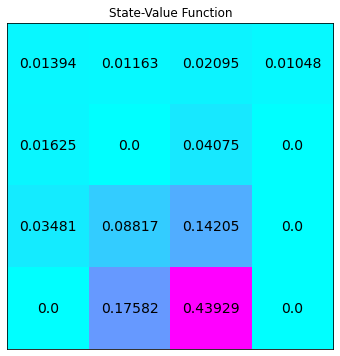

In [18]:
# evaluate the policy 
V = policy_evaluation(env, my_rand_agent.policy)

plot_values_lake(V)

In [19]:
V.sum()

0.9941411498416601

Knowing the transition $\mathbb{P}(S_{t+1},R_{t+1}|S_t,A_t)$, it is natural to compute the q function from value function.

\begin{aligned}
Q(s, a) 
&= \mathbb{E} [R_{t+1} + \gamma V(S_{t+1}) \mid S_t = s, A_t = a] \\
&= \sum_{s'} [r_{t+1} + \gamma V(s')] P(S_{t+1}=s'|S_t=s,A_t=a)
\end{aligned}

In [20]:
#TODO: write the q evaluation from the value function, reward and transition model
def q_from_v(env, V, s, gamma=1):
    #complete here 
    return q

In [21]:
#Done: write the q evaluation from the value function, reward and transition model
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.action_space.n)
    for a in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[s][a]:
            q[a] += prob * (reward + gamma * V[next_state])
    return q

In [22]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
for s in range(env.observation_space.n):
    Q[s] = q_from_v(env, V, s)
print("Action-Value Function:")
print(Q)

Action-Value Function:
[[0.0147094  0.01393978 0.01393978 0.01317015]
 [0.00852356 0.01163091 0.0108613  0.01550788]
 [0.02444514 0.02095298 0.02406033 0.01435346]
 [0.01047649 0.01047649 0.00698432 0.01396865]
 [0.02166487 0.01701828 0.01624865 0.01006281]
 [0.         0.         0.         0.        ]
 [0.05433538 0.04735105 0.05433538 0.00698432]
 [0.         0.         0.         0.        ]
 [0.01701828 0.04099204 0.03480619 0.04640826]
 [0.07020885 0.11755991 0.10595784 0.05895312]
 [0.18940421 0.17582037 0.16001424 0.04297382]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.08799677 0.20503718 0.23442716 0.17582037]
 [0.25238823 0.53837051 0.52711478 0.43929118]
 [0.         0.         0.         0.        ]]


## 3) Policy Improvement

With the q function, we update our policy from $\pi$ to $\pi'$ by acting greedy. That means $\pi'(.|s) = \arg\max_a Q_\pi(a,s)$.

This improvment is given by: $\forall s, V_\pi(s) = \sum_a\pi(a|s)Q_\pi(s,a) \leq \max_a Q_\pi(s,a) = V_{\pi'}(s)$

In [23]:
#TODO: choose the best action in a state s from Q, What the best direction/action on state 1?
def best_action_from_Q(env, Q, s):
  # Complete
  return best_a
print(f"best direction/action on state 1: {best_action_from_Q(env, Q, 1)}")

NameError: ignored

In [24]:
#Done: choose the best action in a state s from Q, What the best direction/action on state 1
def best_action_from_Q(env, Q, s):
  q = Q[s]
  best_a = np.argwhere(q==np.max(q)).flatten()
  return best_a
print(f"best direction/action on state 1: {best_action_from_Q(env, Q, 1)}")

best direction/action on state 1: [3]


In [25]:
#TODO: write the policy improvment update step
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    #complete here    
    return policy

In [26]:
#Done: write the policy improvment update step
def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for s in range(env.observation_space.n):
        q = q_from_v(env, V, s, gamma)
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.action_space.n)[i] for i in best_a], axis=0)/len(best_a)
    return policy

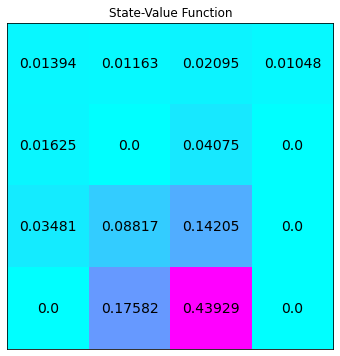

In [27]:
# evaluate the policy 
V = policy_evaluation(env, my_rand_agent.policy)

plot_values_lake(V)

In [28]:
V.sum()

0.9941411498416601

In [29]:
#TODO: Improve and evaluate the policy

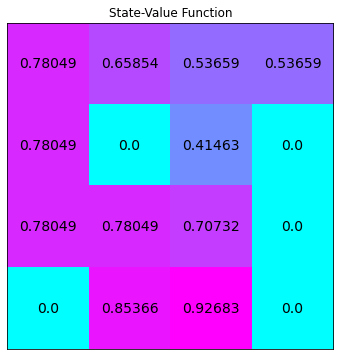

In [30]:
#Done: Improve and evaluate the policy
new_policy = policy_improvement(env, V, gamma=1)

# evaluate the policy 
new_V = policy_evaluation(env, new_policy)

plot_values_lake(new_V)

In [31]:
new_V.sum()

7.756096190590658

## 4) Policy iteration 

$\pi_0 \xrightarrow[]{\text{evaluation}} V_{\pi_0} \xrightarrow[]{\text{improve}}
\pi_1 \xrightarrow[]{\text{evaluation}} V_{\pi_1} \xrightarrow[]{\text{improve}}
\pi_2 \xrightarrow[]{\text{evaluation}} \dots \xrightarrow[]{\text{improve}}
\pi_* \xrightarrow[]{\text{evaluation}} V_*$

In [32]:
#TODO: write the policy iteration
def policy_iteration(env):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n # init a random policy
    # complete here
    return policy, V

In [33]:
#Done: write the policy iteration
def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    while True:
        V = policy_evaluation(env, policy, gamma, theta)
        plot_values_lake(V)
        new_policy = policy_improvement(env, V)
        if np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy))) < theta*1e2:
            break;
        policy = copy.copy(new_policy)
    plot_values_lake(V)
    return policy, V

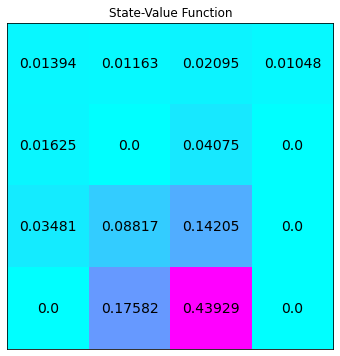

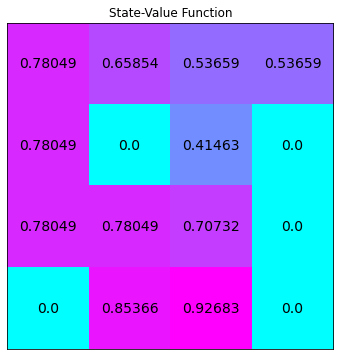

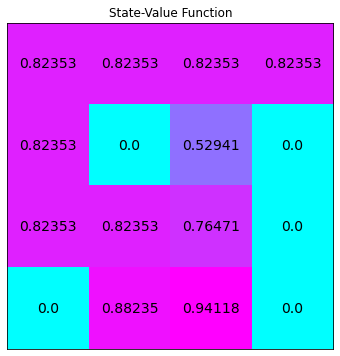

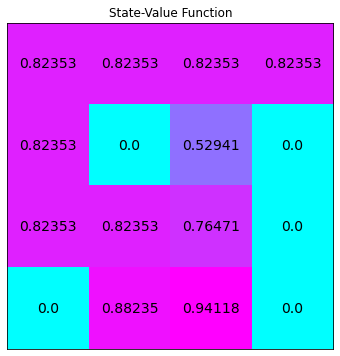


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



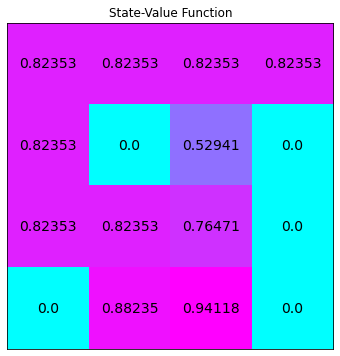

In [34]:

# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values_lake(V_pi)

In [35]:
policy_pi

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.  , 0.5 , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25]])

In [36]:
V_pi.sum()

8.88235133583077

## 4) Value iteration 

Value iteration consists in directly compute the best policy evaluation.
We initialize $V_0$ arbitrarly. And we update it using:

$V_{k+1}(s) = \mathbb{E}_\pi [r + \gamma \max_a Q_k(s_{t+1},a) | S_t = s] $ (2).
$\forall s$, $V_{\pi^*}(s)$ is a fix point for (2), so if $(V_k)_{k\in \mathbb{N}}$ converges, it converges to $V_{\pi^*}$.

In [37]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = V[s]
            V[s] = max(q_from_v(env, V, s, gamma))
            delta = max(delta,abs(V[s]-v))
        if delta < theta:
            break
    policy = policy_improvement(env, V, gamma)
    return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[1.   0.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.5  0.   0.5  0.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]] 



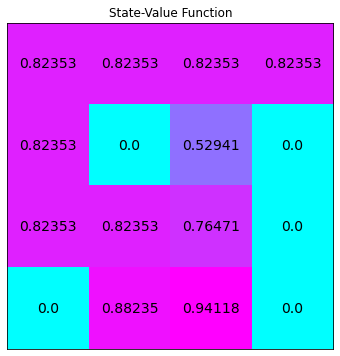

In [38]:
policy_vi, V_vi = value_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
plot_values_lake(V_vi)

In [39]:
V_vi.sum()

8.882351322605881

## Train agent and Run experiments

In [40]:
class MyMDPAgent(Agent):
    def __init__(self, env):
        super().__init__(env)
        self.policy = np.ones([self.env.observation_space.n, self.env.action_space.n]) / self.env.action_space.n
    def act(self, state):
        action = np.random.choice(np.arange(self.env.action_space.n),p=self.policy[state])
        return action
    def train(self):
        self.policy, _ = value_iteration(self.env)

In [41]:
def run_experiment_episode(env, agent, nb_episode):
    rewards = np.zeros(nb_episode)
    for i in range(nb_episode):
        state = env.reset()
        done = False
        rews = []
        while done is False:
            action = agent.act(state)
            state, reward, done, info = env.step(action)
            rews.append(reward)
        rewards[i] = sum(rews)
    return rewards

In [42]:
#TODO: eval best Policy with run_experiment_episode

Text(0.5, 1.0, 'cumulative reward per episode - mdp_agent')

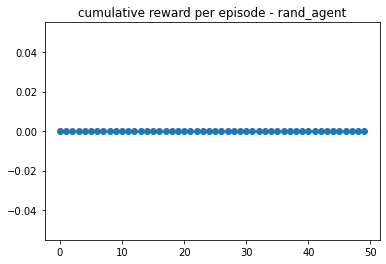

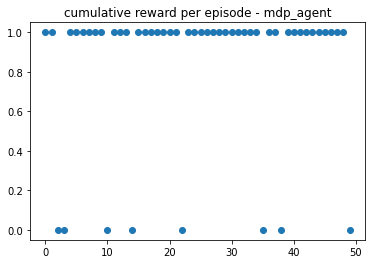

In [43]:
#Done: eval Random Policy with run_experiment_episode
# compute reward with random agent
mdp_agent = MyMDPAgent(env)
rewards = run_experiment_episode(env, mdp_agent, 50)
plt.figure()
plt.plot(rewards, 'o')
plt.title('cumulative reward per episode - rand_agent')
# compute reward after train the agent
mdp_agent.train()
rewards = run_experiment_episode(env, mdp_agent, 50)
plt.figure()
plt.plot(rewards, 'o')
plt.title('cumulative reward per episode - mdp_agent')

In [44]:
gym_render(env=env, directory='./video', agent = mdp_agent, slow_coeff=10)

TypeError: ignored